In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

from pymining import itemmining

%matplotlib inline

In [2]:
#read each month of data into a dataframe 
dfJan = pd.read_csv("data/chicago_taxi_trips_2016_01.csv")
dfFeb = pd.read_csv("data/chicago_taxi_trips_2016_02.csv")
dfMar = pd.read_csv("data/chicago_taxi_trips_2016_03.csv")
dfApr = pd.read_csv("data/chicago_taxi_trips_2016_04.csv")
dfMay = pd.read_csv("data/chicago_taxi_trips_2016_05.csv")
dfJun = pd.read_csv("data/chicago_taxi_trips_2016_06.csv")
dfJul = pd.read_csv("data/chicago_taxi_trips_2016_07.csv")
dfAug = pd.read_csv("data/chicago_taxi_trips_2016_08.csv")
dfSep = pd.read_csv("data/chicago_taxi_trips_2016_09.csv")
dfOct = pd.read_csv("data/chicago_taxi_trips_2016_10.csv")
dfNov = pd.read_csv("data/chicago_taxi_trips_2016_11.csv")
dfDec = pd.read_csv("data/chicago_taxi_trips_2016_12.csv")

In [3]:
#data cleaning 
for df in dfJan, dfFeb, dfMar, dfApr, dfMay, dfJun, dfJul, dfAug, dfSep, dfOct, dfNov, dfDec:
    df.drop(["pickup_census_tract","dropoff_census_tract","taxi_id","pickup_latitude","pickup_longitude","dropoff_longitude","dropoff_latitude","extras","company","trip_total","tolls"],axis = 1,inplace = True)
    df.dropna(subset = ["dropoff_community_area","pickup_community_area"],axis = 0,inplace = True)
    df.fillna(0,inplace = True) #shouldn't we actually drop 0 fares?
    df.drop(df[(df.trip_miles == 0)].index, inplace = True)
    df.drop(df[(df.trip_seconds == 0)].index, inplace = True)
    df.drop(df[(df.fare == 0)].index, inplace = True)

In [4]:
#merge dataframes into one large dataframe for analysis, verify count of rides
dfMerged = dfOct.append(dfNov).append(dfDec).append(dfJan).append(dfFeb).append(dfMar).append(dfApr).append(dfMay)
dfMerged = dfMerged.append(dfJun).append(dfJul).append(dfAug).append(dfSep)
dfMerged.count()

trip_start_timestamp      13335042
trip_end_timestamp        13335042
trip_seconds              13335042
trip_miles                13335042
pickup_community_area     13335042
dropoff_community_area    13335042
fare                      13335042
tips                      13335042
payment_type              13335042
dtype: int64

In [5]:
#read in socioeconomic data into datarame and rename columns 
dfSoc = pd.read_csv("data/chicago_census.csv")
dfSoc.columns = ["community_area_number","community_area_name","percent_housing_crowded","percent_households_below_poverty","percent_aged_16_unemployed","percent_aged_25_no_highschool","percent_non_working_age","income","hardship"]
dfSoc.dropna(inplace = True)

In [6]:
#merge income data to full dataset, once for pickup community area and once for dropoff 
dfMergedA = dfMerged.merge(dfSoc,how = "inner", left_on = "pickup_community_area", right_on = "community_area_number")
dfMergedB = dfMerged.merge(dfSoc,how = "inner", left_on = "dropoff_community_area", right_on = "community_area_number")

In [7]:
#explore correlations between income data and taxi ride data 
dfMergedA.corr()
dfMergedB.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,community_area_number,percent_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_no_highschool,percent_non_working_age,income,hardship
trip_seconds,1.000000,0.143326,0.322411,0.217770,0.449023,0.393684,0.217770,0.098148,0.004759,0.057255,0.147997,0.197950,-0.203781,0.173781
trip_miles,0.143326,1.000000,0.112854,0.074760,0.143154,0.127045,0.074760,0.029189,0.000086,0.016997,0.043780,0.064145,-0.063485,0.053749
pickup_community_area,0.322411,0.112854,1.000000,0.070415,0.302682,0.375512,0.070415,0.024817,0.030629,0.056285,0.020410,0.036361,-0.017568,0.036715
dropoff_community_area,0.217770,0.074760,0.070415,1.000000,0.217772,0.193339,1.000000,0.234422,0.286693,0.217078,0.338096,0.115838,-0.599923,0.388094
fare,0.449023,0.143154,0.302682,0.217772,1.000000,0.362834,0.217772,0.091533,0.005587,0.055982,0.135727,0.191173,-0.192521,0.164700
tips,0.393684,0.127045,0.375512,0.193339,0.362834,1.000000,0.193339,0.023989,-0.041060,-0.010523,0.059974,0.118816,-0.125009,0.078446
community_area_number,0.217770,0.074760,0.070415,1.000000,0.217772,0.193339,1.000000,0.234422,0.286693,0.217078,0.338096,0.115838,-0.599923,0.388094
percent_housing_crowded,0.098148,0.029189,0.024817,0.234422,0.091533,0.023989,0.234422,1.000000,0.650425,0.690545,0.837637,0.569440,-0.604325,0.828793
percent_households_below_poverty,0.004759,0.000086,0.030629,0.286693,0.005587,-0.041060,0.286693,0.650425,1.000000,0.735345,0.564961,0.214263,-0.546869,0.665432
percent_aged_16_unemployed,0.057255,0.016997,0.056285,0.217078,0.055982,-0.010523,0.217078,0.690545,0.735345,1.000000,0.672407,0.636236,-0.489953,0.769164


In [8]:
#percentage of rides with same pickup commmunity area and dropoff community area
dfMerged.loc[dfMerged["pickup_community_area"] == dfMerged["dropoff_community_area"]].count()/dfMerged.count()

trip_start_timestamp      0.236672
trip_end_timestamp        0.236672
trip_seconds              0.236672
trip_miles                0.236672
pickup_community_area     0.236672
dropoff_community_area    0.236672
fare                      0.236672
tips                      0.236672
payment_type              0.236672
dtype: float64

In [9]:
#Relim Frequent pattern mining algorithm 
transaction_tuples  = dfMerged[['pickup_community_area', 'dropoff_community_area']].apply(tuple, axis=1)
relim_input = itemmining.get_relim_input(transaction_tuples)
report = itemmining.relim(relim_input, min_support=10000)
report

{frozenset({25.0}): 10241,
 frozenset({12.0}): 10911,
 frozenset({43.0}): 10944,
 frozenset({42.0}): 11282,
 frozenset({38.0}): 13662,
 frozenset({19.0}): 14255,
 frozenset({13.0}): 16186,
 frozenset({10.0}): 21562,
 frozenset({60.0}): 23500,
 frozenset({23.0}): 26484,
 frozenset({11.0}): 30441,
 frozenset({39.0}): 30911,
 frozenset({15.0}): 31501,
 frozenset({35.0}): 42290,
 frozenset({32.0, 35.0}): 12964,
 frozenset({34.0}): 46434,
 frozenset({32.0, 34.0}): 13546,
 frozenset({8.0, 34.0}): 12009,
 frozenset({31.0}): 47956,
 frozenset({31.0, 32.0}): 12060,
 frozenset({8.0, 31.0}): 10980,
 frozenset({14.0}): 63724,
 frozenset({21.0}): 74857,
 frozenset({6.0, 21.0}): 13248,
 frozenset({8.0, 21.0}): 12551,
 frozenset({2.0}): 80633,
 frozenset({16.0}): 97341,
 frozenset({6.0, 16.0}): 16890,
 frozenset({8.0, 16.0}): 11318,
 frozenset({1.0}): 103139,
 frozenset({1.0, 77.0}): 15164,
 frozenset({1.0, 6.0}): 10983,
 frozenset({1.0, 8.0}): 12400,
 frozenset({41.0}): 107567,
 frozenset({32.0, 41.

In [10]:
#fact check on frequent itemset 8,32 
dfMerged.loc[((dfMerged["pickup_community_area"] == 8) | (dfMerged["dropoff_community_area"] == 8)) & ((dfMerged["pickup_community_area"] == 32) | (dfMerged["dropoff_community_area"] == 32))].count()

trip_start_timestamp      2281451
trip_end_timestamp        2281451
trip_seconds              2281451
trip_miles                2281451
pickup_community_area     2281451
dropoff_community_area    2281451
fare                      2281451
tips                      2281451
payment_type              2281451
dtype: int64

In [11]:
#sort the frequent itemsets by support count to find highest frequency itemsets
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
import operator
sorted_frequent_itemsets = sorted(report.items(), key=operator.itemgetter(1))
sorted_frequent_itemsets.reverse()

In [12]:
#view results, entries with 2 community areas are 2-itemsets
sorted_frequent_itemsets

[(frozenset({8.0}), 7185657),
 (frozenset({32.0}), 5456296),
 (frozenset({28.0}), 2430528),
 (frozenset({8.0, 32.0}), 2281451),
 (frozenset({6.0}), 1457526),
 (frozenset({7.0}), 1302409),
 (frozenset({76.0}), 1300251),
 (frozenset({8.0, 28.0}), 899440),
 (frozenset({24.0}), 887932),
 (frozenset({28.0, 32.0}), 814120),
 (frozenset({33.0}), 752962),
 (frozenset({7.0, 8.0}), 475912),
 (frozenset({8.0, 76.0}), 453597),
 (frozenset({56.0}), 410104),
 (frozenset({3.0}), 395483),
 (frozenset({6.0, 8.0}), 391833),
 (frozenset({32.0, 76.0}), 342740),
 (frozenset({22.0}), 308842),
 (frozenset({8.0, 24.0}), 303845),
 (frozenset({32.0, 33.0}), 274183),
 (frozenset({8.0, 33.0}), 259442),
 (frozenset({77.0}), 252359),
 (frozenset({7.0, 32.0}), 226189),
 (frozenset({6.0, 32.0}), 207092),
 (frozenset({5.0}), 178083),
 (frozenset({6.0, 7.0}), 169686),
 (frozenset({24.0, 32.0}), 148142),
 (frozenset({4.0}), 141115),
 (frozenset({8.0, 56.0}), 139746),
 (frozenset({32.0, 56.0}), 107942),
 (frozenset({41.0

In [13]:
#create new dataframe for counting rides by community areas
dfRideCount = pd.DataFrame(dfSoc["community_area_number"])
dfMerged.reset_index()
dfSoc.reset_index()
dfRideCount["count"] = 0

In [14]:
#functions to count rides by community area and find average tips in community area
def merge_ride_count(row):
    count = dfMerged.loc[(dfMerged["pickup_community_area"] == row) | (dfMerged["dropoff_community_area"] == row)]["fare"].count()
    return count

def merge_ride_mean(row):
    mean = dfMerged.loc[(dfMerged["pickup_community_area"] == row) | (dfMerged["dropoff_community_area"] == row)]["tips"].mean()
    return mean

In [15]:
#apply functions above to obtain new dataframe 
dfSoc["count"] = dfSoc["community_area_number"].apply(merge_ride_count)
dfSoc["mean"] = dfSoc["community_area_number"].apply(merge_ride_mean)

In [16]:
#Linregress to find relationship between income and ride count for each community area
stats.linregress(dfSoc["income"],dfSoc["count"])

LinregressResult(slope=49.700421819321768, intercept=-965122.97524633072, rvalue=0.70798607554616944, pvalue=6.0018715359537301e-13, stderr=5.7246464503555901)

In [17]:
#Linregress to find relationship between income and tips count for each community area
stats.linregress(dfSoc["income"],dfSoc["mean"])

LinregressResult(slope=1.5219428943988531e-05, intercept=1.0758745036421393, rvalue=0.2524280997146936, pvalue=0.026772555482105342, stderr=6.7364782760648346e-06)

49.7004218193 -965122.975246 0.707986075546


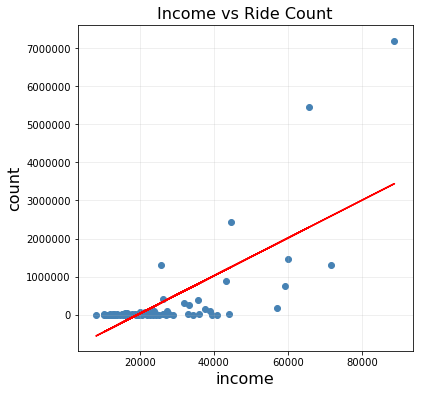

In [18]:
#plot income vs ride count and include regression line 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
slope, intercept, rvalue, pvalue, stderr = stats.linregress(dfSoc["income"],dfSoc["count"])
#Create regression line from formula
y = slope * dfSoc['income'].copy() + intercept
x = dfSoc['income'].copy()
axes.plot(x,y, color='red',label="Income vs. Ride Count")


axes.scatter(dfSoc["income"], dfSoc["count"], color = "steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("income", fontsize=16)
axes.set_ylabel("count", fontsize=16)
axes.set_title("Income vs Ride Count", fontsize=16)
print(slope, intercept,rvalue)

In [19]:
#exploratory decision tree regression to attempt to predict fare amoount
#everything after this was scrapped from final project
#results were not meaningful and predictor had a low accuracy 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:

y = dfMerged["fare"]
x = dfMerged.drop(["fare","payment_type","trip_end_timestamp","trip_start_timestamp"],axis = 1)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 100)

In [21]:

clf_mse = DecisionTreeRegressor(criterion = "mse", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_mse.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=100,
           splitter='best')

In [22]:
clf_mse

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=100,
           splitter='best')

In [23]:
tree.export_graphviz(clf_mse, out_file='tree2.dot')  

with open("tree2.dot", "w") as f:
    f = tree.export_graphviz(clf_mse, out_file=f)

In [24]:
x_train.head()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,tips
441579,600.0,1.9,6.0,5.0,0.0
756544,840.0,1.4,32.0,28.0,2.0
181559,960.0,3.3,24.0,32.0,0.0
865503,360.0,0.8,32.0,8.0,0.0
1164111,360.0,0.9,32.0,8.0,0.0


In [25]:
y_pred = clf_mse.predict(x_test)
from sklearn.cross_validation import cross_val_score
cross_val_score(clf_mse, x_train, y_train, cv = 5)

array([ 0.43271977,  0.29617007,  0.23463478,  0.32241233,  0.31121893])